In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
%matplotlib inline

/home/xcheng0907/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


('k=', 128.0)
('k=', 128.0)
('k=', 256.0)
('k=', 128.0)


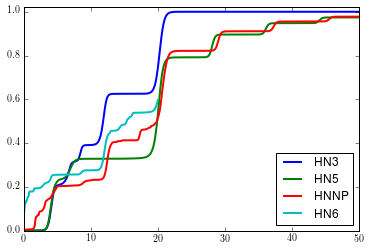

In [3]:
allfiles = ["HN3_AFM_magH_m5e8.csv", "HN5_AFM_magH_m5e8.csv", "HN6_AFM_magH_m5e8.csv", 
         "HN3_AFM_magH_m5e8_v2.csv", "HN5_AFM_magH_m5e8_v2.csv"]
files = ["HN3_AFM_magH_m5e8_v2.csv", "HN5_AFM_magH_m5e8_v2.csv", "HNNP_AFM_magH_m1e9.csv", "HN6_AFM_magH_m5e8.csv"]
files = ['./WL_RG/'+fn for fn in files]
names = ['HN3', 'HN5', 'HNNP', 'HN6']
for fn, nm in zip(files, names):
    msind = -1
    data = np.loadtxt(fn, delimiter=',')
    Hs = data[1:, 1]
    ms = data[1:, msind]
    print('k=', data[0, msind])
    plt.plot(Hs, ms, linewidth=2, label=nm)

plt.xlim([0, 50])
plt.ylim([0, 1.02])
plt.legend(loc='lower right')

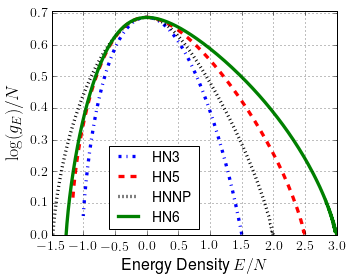

In [19]:
def main():
    titlename = 'HNs Anti-Ferr Ising'
    filename = 'HN35P6DOS_aps.png'
    a3 = np.loadtxt("./WL_RG/H3AFDOS9_r0")
    a5 = np.loadtxt("./WL_RG/H5AFDOS9_r0")
    ap = np.loadtxt("./WL_RG/HPAFDOS9_r0")
    a6 = np.loadtxt("./WL_RG/H6AFDOS9_r0")
    k=9
    #a8 = np.loadtxt("HPAFDOS8_r0")
    #a9 = np.loadtxt("HPAFDOS9_r0")
    styles = ['-.b', '--r', ':k', '-g']

    plt.figure(1, figsize=(5,4))
    p1=plt.plot(a3[:,0]/2**k,a3[:,1]/2**k,styles[0], markersize=8, linewidth = 3.3, label='HN3')
    p2=plt.plot(a5[:,0]/2**k,a5[:,1]/2**k,styles[1], markersize=8, linewidth = 3.3, label='HN5')
    p3=plt.plot(ap[:,0]/2**k,ap[:,1]/2**k,styles[2], markersize=8, linewidth = 3.3, label='HNNP')
    p4=plt.plot(a6[:,0]/2**k+1,a6[:,1]/2**k,styles[3], markersize=8, linewidth = 3.3, label='HN6')
    plt.ylim((0, np.amax([a5[:,1]/2**k])*1.03))
    #p6=plt.plot(a8[:,0]/2**8,a8[:,1]/2**8,styles[5], markersize=8, linewidth = 3.3)
    #p7=plt.plot(a9[:,0]/2**9,a9[:,1]/2**9,styles[6], markersize=8, linewidth = 3.3)
    plt.xlabel('Energy Density $E/N$', fontsize = 16)
    plt.ylabel('$\log(g_E) / N$', fontsize = 18)
    #plt.title(titlename, fontsize = 16)
    plt.grid('on')
    plt.legend(loc=(0.2, 0.025), fontsize=14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.tight_layout()
    #plt.text(-1.4, 0.64, 'N=256', fontsize=24)
    #plt.savefig(filename, dpi=500)
    plt.savefig('HN35P6DOS_h3.pdf')
    plt.show()
main()

## Entropy plots

In [23]:
allfiles = ["HN3_AFM_Entropy_k6_64_the.csv", "HN5_AFM_Entropy_k6_64_the.csv", "HNNP_AFM_Entropy_k16_64_the.csv", 
         "HN6_AFM_Entropy_k16_64_the.csv"]
files = ['./WL_RG/'+fn for fn in allfiles]
names = ['HN3', 'HN5', 'HNNP', 'HN6']
data = {}
for i in range(len(files)):
    data[names[i]] = np.loadtxt(files[i], delimiter=',')

(0, 0.3)

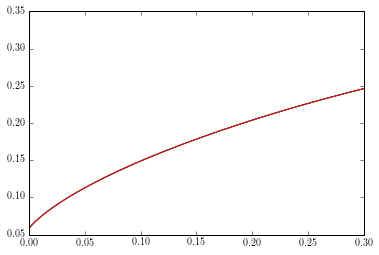

In [29]:
dt = data[names[1]]
ks2plot = [16, 32, 64]
inds = np.array([x in ks2plot for x in dt[0, :]])
x = dt[1:, 0]
y = dt[1:, inds]
plt.plot(x, y)
plt.xlim([0, 0.3])

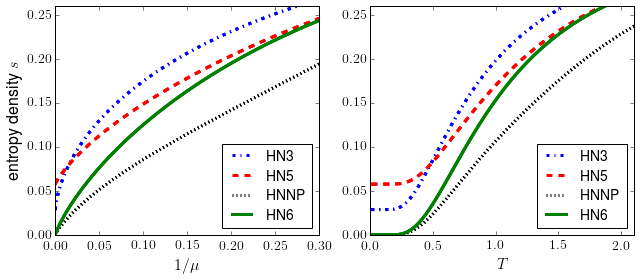

In [51]:
ks2plot = [16, 32, 64]
styles = ['-.b', '--r', ':k', '-g']
ls=3
plt.figure(figsize=(9, 4))
for hn, sty in zip(names, styles):
    dt = data[hn]
    inds = np.array([x in ks2plot for x in dt[0, :]])
    x = dt[1:, 0]
    ts = dt[1:, 1]
    y = dt[1:, inds]
    plt.subplot(121)
    plt.plot(x, y[:, 0], sty, label=hn, linewidth=ls)
    plt.plot(x, y[:, 1:], sty, linewidth=ls)
    plt.subplot(122)
    plt.plot(ts, y[:, 0], sty, label=hn, linewidth=ls)
    plt.plot(ts, y[:, 1:], sty, linewidth=ls)
plt.subplot(121)
plt.xlim([0, 0.3])
plt.ylim([0, 0.26])
plt.tick_params(labelsize=14)
plt.xlabel('$1/\mu$', fontsize = 16)
plt.ylabel('entropy density $s$', fontsize = 16)
plt.legend(loc='lower right', fontsize=14)

plt.subplot(122)
plt.xlim([0, 2.1])
plt.ylim([0, 0.26])
plt.tick_params(labelsize=14)
plt.xlabel('$T$', fontsize = 16)
plt.legend(loc='lower right', fontsize=14)

plt.tight_layout()
plt.savefig('HNs_entropy_density.pdf')
plt.savefig('HNs_entropy_density.png', dpi=400)